In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder 


from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score   
from sklearn.linear_model import LogisticRegression, RidgeClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

import xgboost
import pickle

from flaml import AutoML 

import warnings
warnings.filterwarnings('ignore')


# 1. Reading Dataset

In [103]:
data = pd.read_excel("/home/moni/Desktop/Task_1/Raisin_Dataset/Raisin_Dataset.xlsx")

# 2. Overview of the Dataset 

In [45]:
data.head() 

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
data.shape

(900, 8)

In [5]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [6]:
data['Class'].value_counts() 

Besni      450
Kecimen    450
Name: Class, dtype: int64

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


# 3. Some Statistics

In [8]:
# Maximum Minimum, Average value of the Area 
area_kecimen_min = np.min(data[data.Class == 'Kecimen']['Area'])
area_besni_min = np.min(data[data.Class == "Besni"]['Area']) 
print("Minimum area of kecimen is :", area_kecimen_min)
print("Minimum area of besni is :", area_besni_min) 

area_kecimen_max = np.max(data[data.Class == 'Kecimen']['Area'])
area_besni_max = np.max(data[data.Class == "Besni"]['Area']) 
print("Maximum area of kecimen is :", area_kecimen_min)
print("Maximum area of besni is :", area_besni_min) 

Minimum area of kecimen is : 25387
Minimum area of besni is : 40702
Maximum area of kecimen is : 25387
Maximum area of besni is : 40702


In [9]:
# Maximum Minimum, Average value of the MajorAxisLength 
MajorAxisLength_kecimen_min = np.min(data[data.Class == 'Kecimen']['MajorAxisLength'])
MajorAxisLength_besni_min = np.min(data[data.Class == "Besni"]['MajorAxisLength']) 
print("Minimum MajorAxisLength of kecimen is :", MajorAxisLength_kecimen_min)
print("Minimum MajorAxisLength of besni is :", MajorAxisLength_besni_min) 

MajorAxisLength_kecimen_max = np.max(data[data.Class == 'Kecimen']['MajorAxisLength'])
MajorAxisLength_besni_max = np.max(data[data.Class == "Besni"]['MajorAxisLength']) 
print("Maximum MajorAxisLength of kecimen is :", MajorAxisLength_kecimen_max)
print("Maximum MajorAxisLength of besni is :", MajorAxisLength_besni_max) 

Minimum MajorAxisLength of kecimen is : 225.629541
Minimum MajorAxisLength of besni is : 274.1689537
Maximum MajorAxisLength of kecimen is : 843.9566534
Maximum MajorAxisLength of besni is : 997.2919406


In [10]:
# Maximum, Minimum, Average value of the MinorAxisLength 
MinorAxisLength_kecimen_min = np.min(data[data.Class == 'Kecimen']['MinorAxisLength'])
MinorAxisLength_besni_min = np.min(data[data.Class == "Besni"]['MinorAxisLength']) 
print("Minimum MinorAxisLength of kecimen is :", MinorAxisLength_kecimen_min)
print("Minimum MinorAxisLength of besni is :", MinorAxisLength_besni_min) 

MinorAxisLength_kecimen_max = np.max(data[data.Class == 'Kecimen']['MinorAxisLength'])
MinorAxisLength_besni_max = np.max(data[data.Class == "Besni"]['MinorAxisLength']) 
print("Maximum MinorAxisLength of kecimen is :", MinorAxisLength_kecimen_max)
print("Maximum MinorAxisLength of besni is :", MinorAxisLength_besni_max)  

Minimum MinorAxisLength of kecimen is : 143.7108718
Minimum MinorAxisLength of besni is : 172.5083892
Maximum MinorAxisLength of kecimen is : 326.8987235
Maximum MinorAxisLength of besni is : 492.2752785


In [11]:
# Maximum, Minimum, Average value of the Eccentricity 
Eccentricity_kecimen_min = np.min(data[data.Class == 'Kecimen']['Eccentricity'])
Eccentricity_besni_min = np.min(data[data.Class == "Besni"]['Eccentricity']) 
print("Minimum Eccentricity of kecimen is :", Eccentricity_kecimen_min)
print("Minimum Eccentricity of besni is :", Eccentricity_besni_min) 

Eccentricity_kecimen_max = np.max(data[data.Class == 'Kecimen']['Eccentricity'])
Eccentricity_besni_max = np.max(data[data.Class == "Besni"]['Eccentricity'])
print("Maximum Eccentricity of kecimen is :", Eccentricity_kecimen_max)
print("Maximum Eccentricity of besni is :", Eccentricity_besni_max)   

Minimum Eccentricity of kecimen is : 0.348729642
Minimum Eccentricity of besni is : 0.500990716
Maximum Eccentricity of kecimen is : 0.923770364
Maximum Eccentricity of besni is : 0.96212444


In [12]:
# Maximum, Minimum, Average value of the ConvexArea 
ConvexArea_kecimen_min = np.min(data[data.Class == 'Kecimen']['ConvexArea'])
ConvexArea_besni_min = np.min(data[data.Class == "Besni"]['ConvexArea']) 
print("Minimum ConvexArea of kecimen is :", ConvexArea_kecimen_min)
print("Minimum ConvexArea of besni is :", ConvexArea_besni_min) 

ConvexArea_kecimen_max = np.max(data[data.Class == 'Kecimen']['ConvexArea'])
ConvexArea_besni_max = np.max(data[data.Class == "Besni"]['ConvexArea'])
print("Maximum ConvexArea of kecimen is :", ConvexArea_kecimen_max)
print("Maximum ConvexArea of besni is :", ConvexArea_besni_max)   

Minimum ConvexArea of kecimen is : 26139
Minimum ConvexArea of besni is : 41924
Maximum ConvexArea of kecimen is : 221396
Maximum ConvexArea of besni is : 278217


In [13]:
# Maximum, Minimum, Average value of the Extent
Extent_kecimen_min = np.min(data[data.Class == 'Kecimen']['Extent'])
Extent_besni_min = np.min(data[data.Class == "Besni"]['Extent']) 
print("Minimum Extent of kecimen is :", Extent_kecimen_min)
print("Minimum Extent of besni is :", Extent_besni_min) 

Extent_kecimen_max = np.max(data[data.Class == 'Kecimen']['Extent'])
Extent_besni_max = np.max(data[data.Class == "Besni"]['Extent']) 
print("Maximum Extent of kecimen is :", Extent_kecimen_max)
print("Maximum Extent of besni is :", Extent_besni_max) 

Minimum Extent of kecimen is : 0.454188929
Minimum Extent of besni is : 0.379856115
Maximum Extent of kecimen is : 0.835454545
Maximum Extent of besni is : 0.830632225


In [14]:
# Maximum, Minimum, Average value of the Extent Perimeter 
Perimeter_kecimen_min = np.min(data[data.Class == 'Kecimen']['Perimeter'])
Perimeter_besni_min = np.min(data[data.Class == "Besni"]['Perimeter']) 
print("Minimum Perimeter of kecimen is :", Perimeter_kecimen_min)
print("Minimum Perimeter of besni is :", Perimeter_besni_min) 

Perimeter_kecimen_max = np.max(data[data.Class == 'Kecimen']['Perimeter'])
Perimeter_besni_max = np.max(data[data.Class == "Besni"]['Perimeter'])
print("Maximum Perimeter of kecimen is :", Perimeter_kecimen_max)
print("Maximum Perimeter of besni is :", Perimeter_besni_max) 

Minimum Perimeter of kecimen is : 619.074
Minimum Perimeter of besni is : 771.797
Maximum Perimeter of kecimen is : 2253.557
Maximum Perimeter of besni is : 2697.753


# 4. Exploratory Data Analysis(EDA)

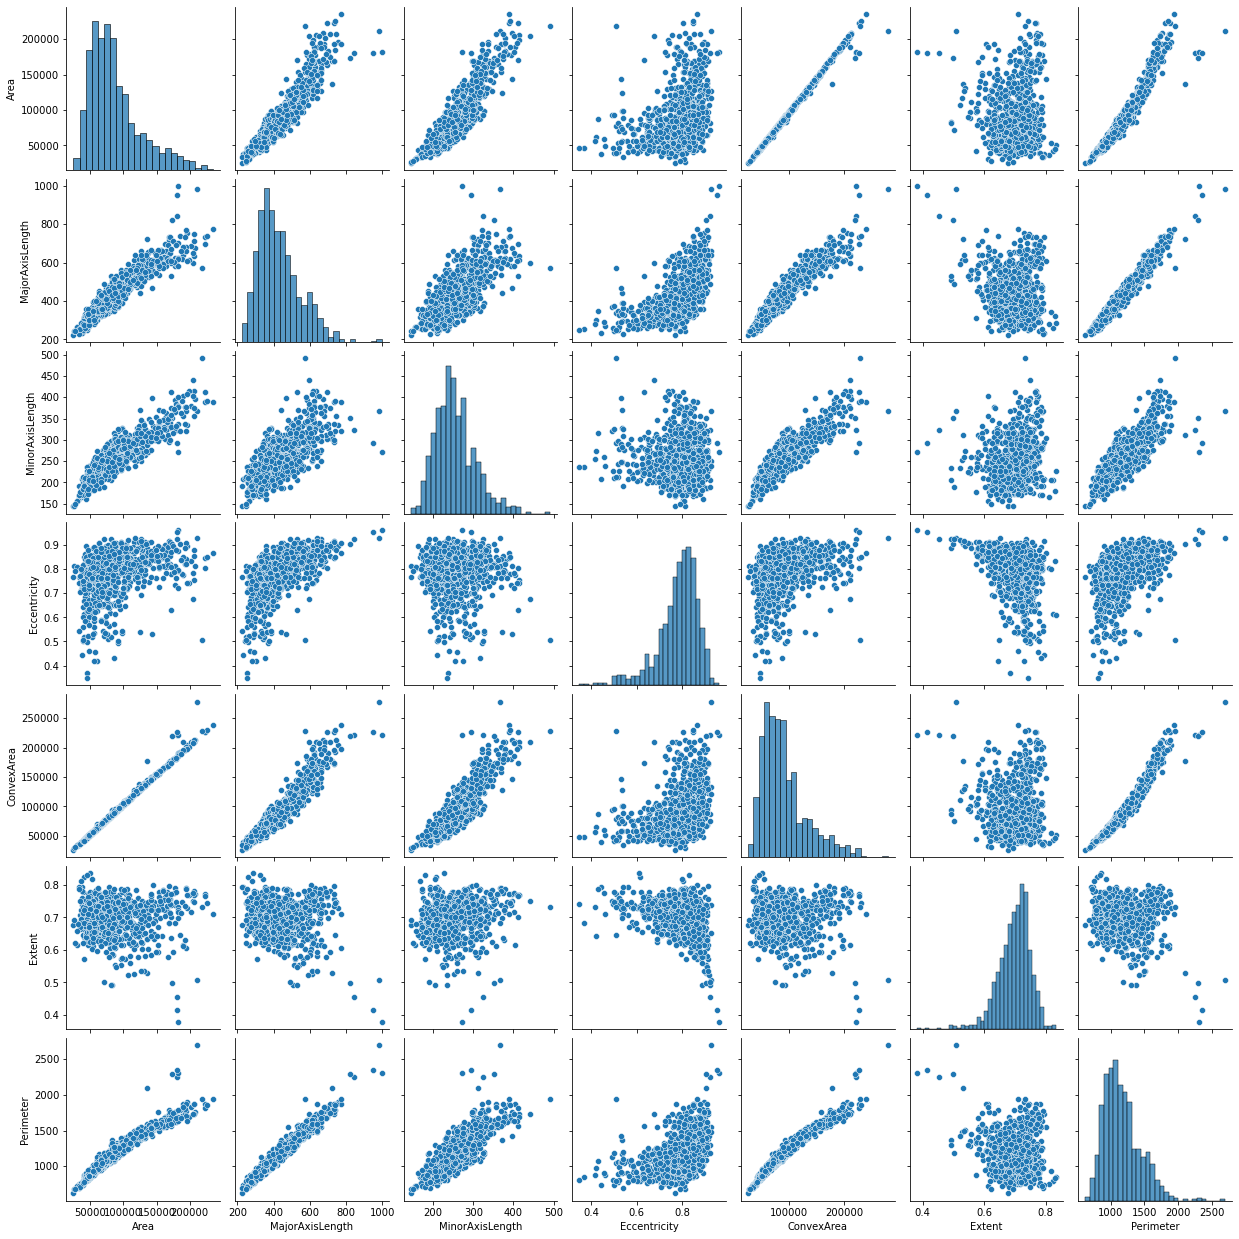

In [15]:
sns.pairplot(data)

<AxesSubplot:xlabel='Class', ylabel='count'>

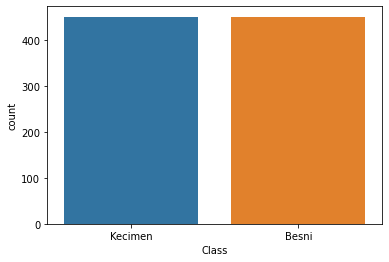

In [16]:
sns.countplot(x='Class', data=data) 

<AxesSubplot:xlabel='Area'>

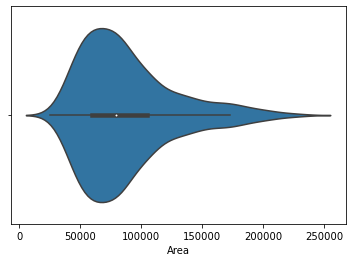

In [17]:
sns.violinplot(x=data['Area']) 

<AxesSubplot:xlabel='Class', ylabel='Area'>

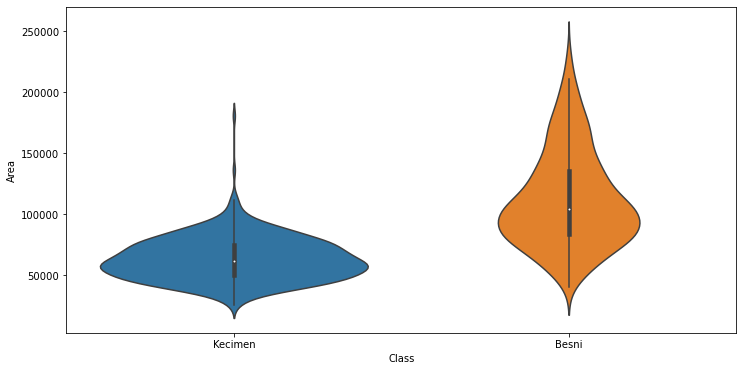

In [18]:
plt.figure(figsize=(12, 6)) 
sns.violinplot(x="Class", y="Area", data=data)

<AxesSubplot:xlabel='Class', ylabel='MajorAxisLength'>

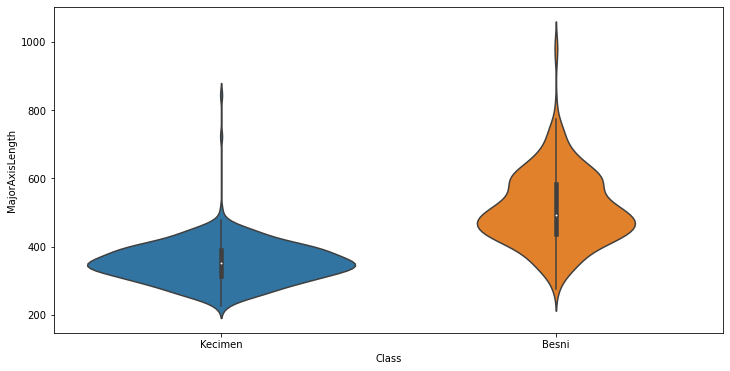

In [19]:
plt.figure(figsize=(12, 6)) 
sns.violinplot(x='Class', y='MajorAxisLength', data=data) 

<AxesSubplot:xlabel='Class', ylabel='MinorAxisLength'>

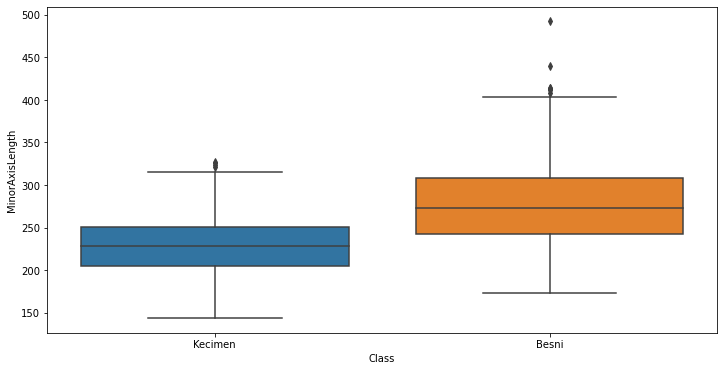

In [20]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Class', y='MinorAxisLength', data=data) 

<AxesSubplot:xlabel='Class', ylabel='Eccentricity'>

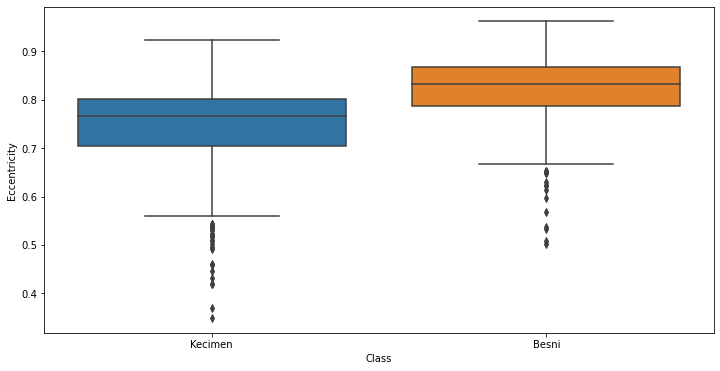

In [21]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Class', y='Eccentricity', data=data)

<AxesSubplot:xlabel='Class', ylabel='ConvexArea'>

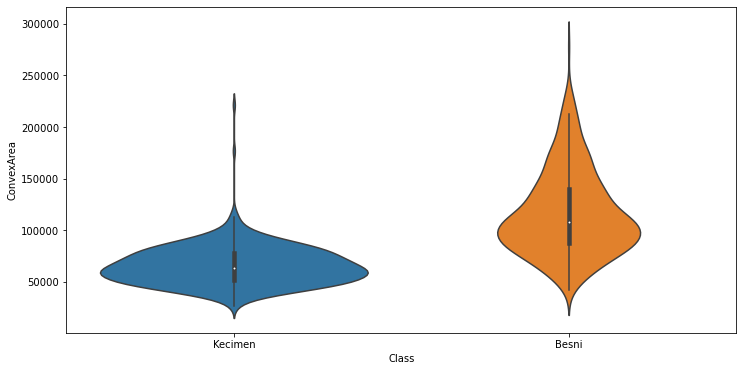

In [22]:
plt.figure(figsize=(12, 6)) 
sns.violinplot(x='Class', y='ConvexArea', data=data) 

<AxesSubplot:xlabel='Class', ylabel='Extent'>

<Figure size 864x432 with 0 Axes>

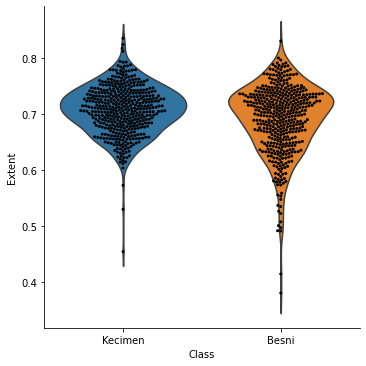

In [23]:
plt.figure(figsize=(12, 6)) 
g = sns.catplot(x='Class', y='Extent', kind="violin", inner=None, data=data) 
sns.swarmplot(x="Class", y="Extent", color="k", size=3, data=data, ax=g.ax)

<AxesSubplot:xlabel='Class', ylabel='Perimeter'>

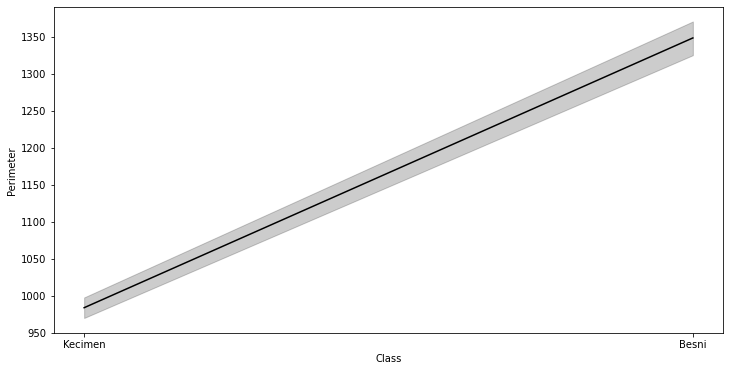

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Class', y='Perimeter', color='k', data=data) 

<AxesSubplot:>

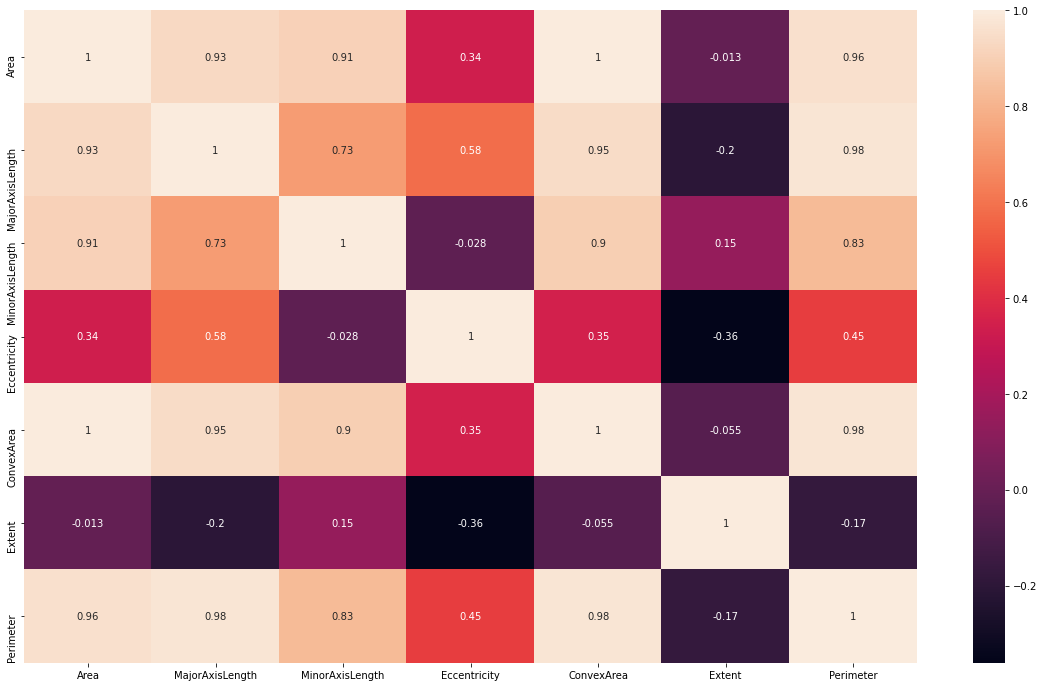

In [25]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True) 

# 5. checking Null Value

In [26]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

# 6. Balance, Imbalance Check

In [27]:
data['Class'].value_counts()

Besni      450
Kecimen    450
Name: Class, dtype: int64

<AxesSubplot:>

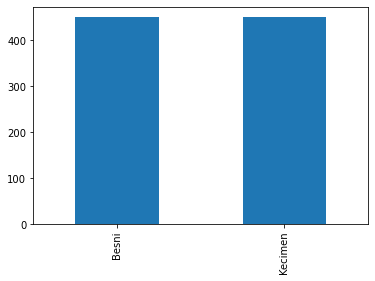

In [28]:
data['Class'].value_counts().plot(kind='bar')

# 7. Drop Duplicate data

In [29]:
# Checking duplicate data 
data.duplicated().value_counts()

False    900
dtype: int64

In [30]:
data.drop_duplicates(keep=False, inplace=True)
data.shape 

(900, 8)

# 8. Outlier Detection 

Text(0.5, 1.0, 'Outlier in MinorAxisLength feature')

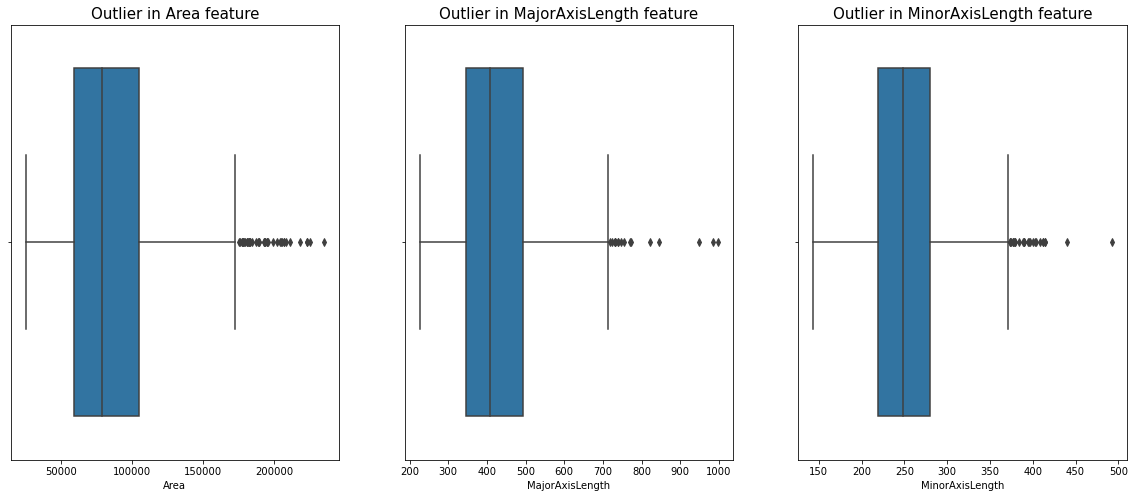

In [31]:
plt.figure(figsize=(20, 8)) 
plt.subplot(131) 
sns.boxplot(x=data['Area'])
plt.title("Outlier in Area feature", fontsize=15) 

plt.subplot(132)
sns.boxplot(x=data['MajorAxisLength']) 
plt.title("Outlier in MajorAxisLength feature", fontsize=15) 

plt.subplot(133) 
sns.boxplot(data['MinorAxisLength'])
plt.title("Outlier in MinorAxisLength feature", fontsize=15) 

Text(0.5, 1.0, 'Outlier in Extent feature')

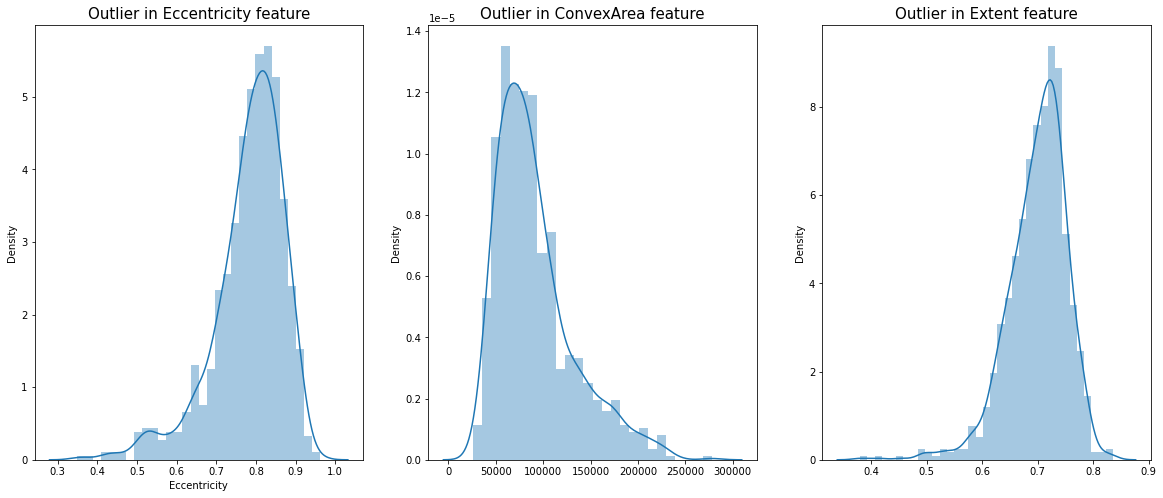

In [32]:
plt.figure(figsize=(20, 8)) 
plt.subplot(131) 
sns.distplot(data['Eccentricity'])
plt.title("Outlier in Eccentricity feature", fontsize=15) 

plt.subplot(132) 
sns.distplot(x=data['ConvexArea'])
plt.title("Outlier in ConvexArea feature", fontsize=15) 

plt.subplot(133) 
sns.distplot(x=data['Extent'])
plt.title("Outlier in Extent feature", fontsize=15) 


Text(0.5, 1.0, 'Outlier in Perimeter feature')

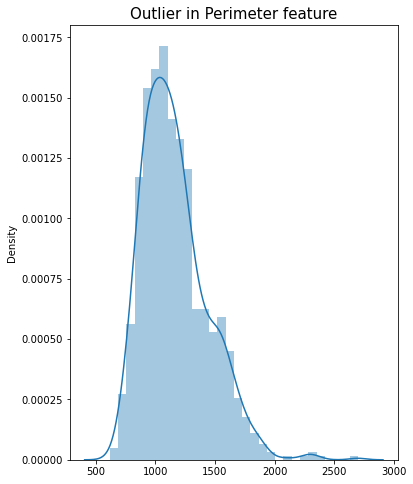

In [33]:
plt.figure(figsize=(20, 8)) 
plt.subplot(131) 
sns.distplot(x=data['Perimeter'])
plt.title("Outlier in Perimeter feature", fontsize=15) 

<AxesSubplot:xlabel='Perimeter', ylabel='Count'>

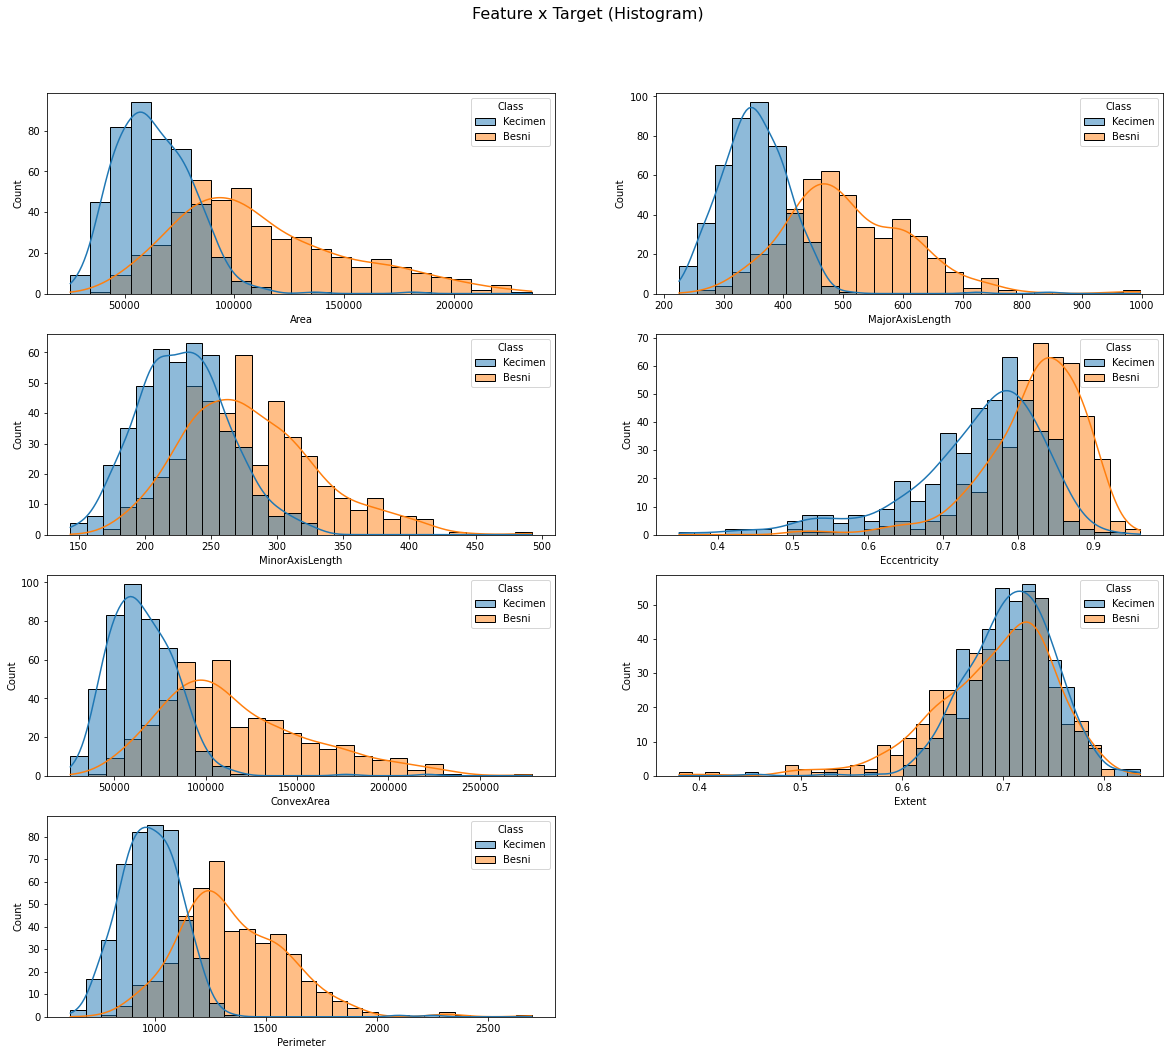

In [34]:
# Using histplot, where hue is the "Class" feature  
area = plt.figure(figsize=(20,17))

g1 = area.add_subplot(4,2,1)
g2 = area.add_subplot(4,2,2)
g3 = area.add_subplot(4,2,3)
g4 = area.add_subplot(4,2,4)
g5 = area.add_subplot(4,2,5)
g6 = area.add_subplot(4,2,6)
g7 = area.add_subplot(4,2,7)

area.suptitle('Feature x Target (Histogram)', fontsize = 16, y = 0.95)
sns.histplot(data = data, x = 'Area', hue = 'Class', ax=g1, kde=True)
sns.histplot(data = data, x = 'MajorAxisLength', hue = 'Class', ax=g2, kde=True)
sns.histplot(data = data, x = 'MinorAxisLength', hue = 'Class', ax=g3, kde=True)
sns.histplot(data = data, x = 'Eccentricity', hue = 'Class', ax=g4, kde=True)
sns.histplot(data = data, x = 'ConvexArea', hue = 'Class', ax=g5, kde=True)
sns.histplot(data = data, x = 'Extent', hue = 'Class', ax=g6, kde=True)
sns.histplot(data = data, x = 'Perimeter', hue = 'Class', ax=g7, kde=True)



##### There are right skewed and left skewed in some features, in anotehr way we can say some features are not normally distributed. We need to drop those data for increasing accuracy. But our dataset is very small for this did not drop the outlier data, Instead I will standardise, Normalize the dataset. 

# 9. Encoding (Categorical to Numerical) 

In [46]:
le = LabelEncoder() 
y = le.fit_transform(data['Class'])  

In [47]:
le.classes_ 

array(['Besni', 'Kecimen'], dtype=object)

In [48]:
le.inverse_transform([0,1])

array(['Besni', 'Kecimen'], dtype=object)

# 10. Feature Engineering

### 1. Feature Selection 

In [39]:
X = data.drop('Class', 1)
Y = y

##### Fit the Model and Calculate Metrics

In [40]:
def fit_model(X, Y):
    '''Use a RandomForestClassifier for this problem.'''
    
    # define the model to use
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Train the model
    model.fit(X, Y)
    
    return model

In [41]:
def calculate_metrics(model, X_test_scaled, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_predict_r = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics for assesing performance of the model.
    roc=roc_auc_score(Y_test, y_predict_r)
    acc = accuracy_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    
    return acc, roc, prec, rec, f1

In [42]:
def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train_scaled, Y_train)

    # Make predictions on test dataset and calculate metrics.
    roc, acc, prec, rec, f1 = calculate_metrics(model, X_test_scaled, Y_test)

    return acc, roc, prec, rec, f1

In [43]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])
    
    return display_df

In [44]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.844444,0.844444,0.803922,0.911111,0.854167,7


##### Correlation Matrix

In [45]:
data_copy = data
# Integer encode the target variable, diagnosis
data_copy["class_int"] = (data_copy["Class"] == 'Besni').astype('int')

# Drop the previous string column
data_copy.drop(['Class'], axis=1, inplace=True)

# Check the new column
data_copy.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,class_int
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


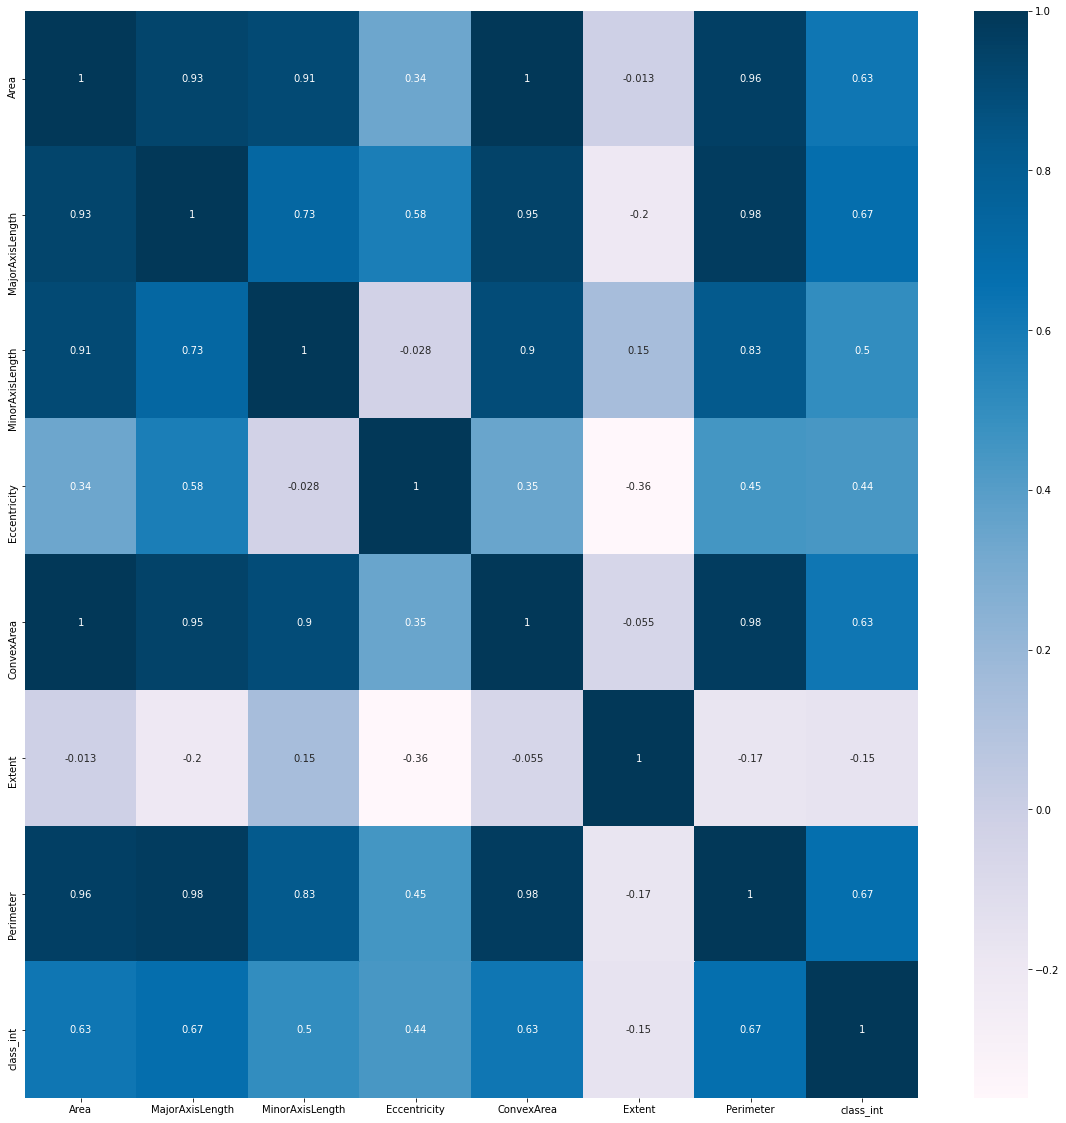

In [46]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = data_copy.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

##### Correlation with the target variable

In [47]:
# Get the absolute value of the correlation
cor_target = abs(cor["class_int"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('class_int') 

# Display the results
print(names)

['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Perimeter']


In [48]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(data[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.844444,0.844444,0.803922,0.911111,0.854167,7
Strong features,0.822222,0.822222,0.795918,0.866667,0.829787,6


##### Univariate Selection with Sci-Kit Learn

In [49]:
def univariate_selection():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=5)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(data_copy.drop("class_int",1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = data_copy.drop("class_int",1 ).columns[feature_idx]
    
    return feature_names

In [50]:
univariate_feature_names = univariate_selection()

Area: True
MajorAxisLength: True
MinorAxisLength: True
Eccentricity: False
ConvexArea: True
Extent: False
Perimeter: True


In [51]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(data_copy[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.844444,0.844444,0.803922,0.911111,0.854167,7
Strong features,0.822222,0.822222,0.795918,0.866667,0.829787,6
F-test,0.833333,0.833333,0.806122,0.877778,0.840426,5


##### Recursive Feature Elimination

In [52]:
def run_rfe():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Wrap RFE around the model
    rfe = RFE(model)
    
    # Fit RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = data_copy.drop("class_int",1 ).columns[rfe.get_support()]
    
    return feature_names

rfe_feature_names = run_rfe()

In [53]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(data_copy[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = results.append(rfe_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.844444,0.844444,0.803922,0.911111,0.854167,7
Strong features,0.822222,0.822222,0.795918,0.866667,0.829787,6
F-test,0.833333,0.833333,0.806122,0.877778,0.840426,5
RFE,0.833333,0.833333,0.812500,0.866667,0.838710,3


##### L1 Regularization

In [54]:
def run_l1_regularization():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False))
    selection.fit(X_train_scaled, Y_train)

    feature_names = data_copy.drop("class_int",1 ).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()

In [55]:
# Calculate and check model metrics
l1reg_eval_df = evaluate_model_on_features(data_copy[l1reg_feature_names], Y)
l1reg_eval_df.index = ['L1 Reg']

# Append to results and display
results = results.append(l1reg_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.844444,0.844444,0.803922,0.911111,0.854167,7
Strong features,0.822222,0.822222,0.795918,0.866667,0.829787,6
F-test,0.833333,0.833333,0.806122,0.877778,0.840426,5
RFE,0.833333,0.833333,0.812500,0.866667,0.838710,3
L1 Reg,0.833333,0.833333,0.812500,0.866667,0.838710,5


# 11. Shuffle the Dataset

In [38]:
data = shuffle(data)
data.shape 

(900, 8)

In [39]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,Besni
204,66508,344.904520,249.089782,0.691685,69240,0.703015,1001.714,Kecimen
614,62451,337.289987,237.705386,0.709455,64499,0.696275,963.009,Besni
330,56837,368.372726,198.774656,0.841920,59040,0.634965,973.599,Kecimen
338,74612,430.865189,229.286718,0.846647,79297,0.665347,1140.399,Kecimen


# 12. Dividing Dataset 

In [49]:
data_array = data.values 
X = data_array[:, 0:7]
#y = data_array[:, 7] 

In [50]:
X[1]

array([75166, 406.690687, 243.0324363, 0.801805234, 78789, 0.68412957,
       1121.786], dtype=object)

In [51]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.1, random_state=42)

# 13. Using Machine Learning Scikit-Learn

### 1. Logistic Regression

In [97]:
logistic_model = LogisticRegression() 
logistic_model.fit(x_train, y_train) 

LogisticRegression()

In [98]:
y_pred = logistic_model.predict(x_test) 

print("Accuracy :", logistic_model.score(x_test, y_test)) 

Accuracy : 0.8444444444444444


<AxesSubplot:>

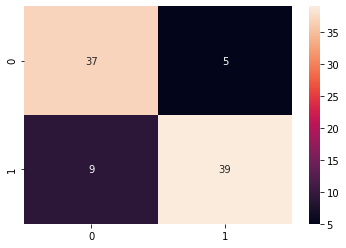

In [99]:
# Confusion Matrix 
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True) 

In [100]:
# Classification Report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.89      0.81      0.85        48

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.85      0.84      0.84        90



### Using Hyperparameter Tuning of Logistic Regression

In [86]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2'] 
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train) 

# summarize results 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.860082 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.859671 (0.034989) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.857613 (0.036447) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.859259 (0.032912) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.860082 (0.034822) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.854733 (0.036856) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.858848 (0.033232) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.859671 (0.037103) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856790 (0.034861) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.858025 (0.033089) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.858436 (0.037410) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.859259 (0.036428) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.859259 (0.032912) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.858848 (0.036994) with

In [108]:
logis_model = LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg') 
logis_model.fit(x_train, y_train)  

LogisticRegression(C=10, solver='newton-cg')

In [109]:
y_pred = logis_model.predict(x_test) 

print("Accuracy :", logis_model.score(x_test, y_test)) 

Accuracy : 0.8


<AxesSubplot:>

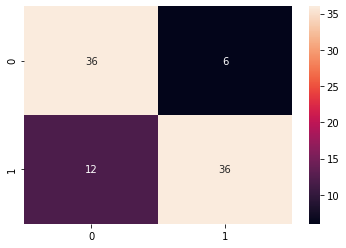

In [110]:
# Confusion Matrix 
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True) 

In [111]:
# Classification Report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        42
           1       0.86      0.75      0.80        48

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.81      0.80      0.80        90



### 2. Using Decission Tree Classifier 

In [112]:
d_tree = DecisionTreeClassifier() 
d_tree.fit(x_train, y_train) 

print("Accuracy :", d_tree.score(x_test, y_test)) 

Accuracy : 0.7888888888888889


### 3. Using Hyperparameter Tuning of Ridge Classifier 

In [113]:
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train) 

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.861317 using {'alpha': 0.6}
0.860082 (0.034233) with: {'alpha': 0.1}
0.859671 (0.034551) with: {'alpha': 0.2}
0.860494 (0.033908) with: {'alpha': 0.3}
0.860494 (0.033908) with: {'alpha': 0.4}
0.860494 (0.033908) with: {'alpha': 0.5}
0.861317 (0.033384) with: {'alpha': 0.6}
0.861317 (0.033384) with: {'alpha': 0.7}
0.861317 (0.033384) with: {'alpha': 0.8}
0.861317 (0.033384) with: {'alpha': 0.9}
0.861317 (0.033384) with: {'alpha': 1.0}


In [114]:
model = RidgeClassifier(alpha= 0.6)
model.fit(x_train, y_train) 

RidgeClassifier(alpha=0.6)

In [115]:
y_pred = model.predict(x_test) 

print("Accuracy :", model.score(x_test, y_test)) 

Accuracy : 0.8333333333333334


### 4. Using Hyperparameter Tuning of Support Vector Classifier

In [116]:
sc = StandardScaler() 
sc.fit(x_train)

x_train = sc.transform(x_train) 
x_test = sc.transform(x_test) 
x_train = pd.DataFrame(x_train) 
x_test = pd.DataFrame(x_test) 

# training 
model = SVC(kernel = 'rbf', C = 100, gamma = 0.05) 
model.fit(x_train, y_train) 

# predicting 
pred_y = model.predict(x_test) 
print("Accuracy :", model.score(x_test, y_test)) 

Accuracy : 0.8333333333333334


<AxesSubplot:>

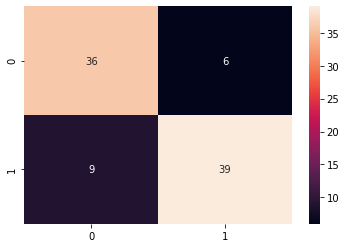

In [117]:
# Confusion Matrix 
con_matrix = confusion_matrix(y_test, pred_y) 
sns.heatmap(con_matrix, annot=True) 

In [118]:
# Classification Report 
print(classification_report(y_test, pred_y)) 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.87      0.81      0.84        48

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



In [119]:
# StandardScaler() 
# kernel = 'rbf', C = 100, gamma = 0.05
svm = SVC().fit(x_train, y_train) 
svm_y_pred = svm.predict(x_test) 

print("Accuracy :", svm.score(x_test, y_test)) 

Accuracy : 0.8555555555555555


### 5. Using RandomForestClassifier

In [120]:
rfc = RandomForestClassifier() 
rfc.fit(x_train, y_train) 

RandomForestClassifier()

In [121]:
y_pred = rfc.predict(x_test) 

print("Accuracy :", rfc.score(x_test, y_test)) 

Accuracy : 0.8444444444444444


<AxesSubplot:>

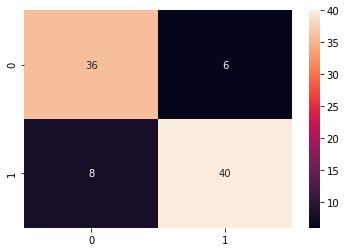

In [122]:
# Confusion Matrix 
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True) 

In [123]:
# Classification Report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.83      0.85        48

    accuracy                           0.84        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.85      0.84      0.84        90



### 6. Using Hyperparameter Tuning of RandomForestClassifier

In [124]:
rfc = RandomForestClassifier() 

In [125]:
hyperparameter_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [128]:
random_cv = RandomizedSearchCV(estimator=rfc,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=50,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [129]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [130]:
random_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=5,
                       n_estimators=1000)

In [131]:
rfc = RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=5,
                       n_estimators=1000)

In [132]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=5,
                       n_estimators=1000)

In [133]:
predict = rfc.predict(x_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0])

In [136]:
# Using cross_val_score 
cvs = cross_val_score(rfc, x_train, y_train, cv=5)
cvs.mean()

0.8691358024691358

### 7. Using Hyperparameter Tuning of XGBoost

In [137]:
classifier=xgboost.XGBClassifier()

In [138]:
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

In [139]:
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=50,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [140]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[01:18:41] WARNING: ../src/learner.cc:541: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:18:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [141]:
random_cv.best_estimator_ 

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=None, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=900, n_jobs=4, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

In [143]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=None, max_depth=5,
              min_child_weight=2, monotone_constraints=None,
              n_estimators=900, n_jobs=4, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

In [144]:
classifier.fit(x_train,y_train)

[01:19:23] WARNING: ../src/learner.cc:541: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:19:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=None, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=900, n_jobs=4, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

In [145]:
predict = classifier.predict(x_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0])

<AxesSubplot:>

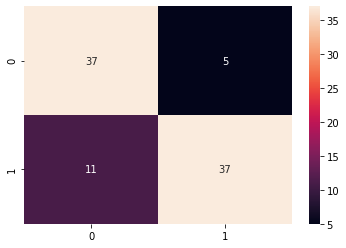

In [146]:
# confusion matrix 
con_matrix = confusion_matrix(y_test, predict)
sns.heatmap(con_matrix, annot=True) 

In [147]:
# classification report 
print(classification_report(y_test, predict)) 

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        42
           1       0.88      0.77      0.82        48

    accuracy                           0.82        90
   macro avg       0.83      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90



In [148]:
# Using cross_val_score 
cvs = cross_val_score(classifier, x_train, y_train,cv=5)
cvs.mean()

[01:21:28] WARNING: ../src/learner.cc:541: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:21:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:21:29] WARNING: ../src/learner.cc:541: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:21:29] WARNING: ../src/learner.cc:1061: Starting i

0.8753086419753087

In [ ]:
# model saving 
filename = "/home/moni/Desktop/Task_1/xgboost_raisin_classification.sav" 
pickle.dump(classifier, open(filename, 'wb')) 

# 14. Using PyCaret

In [130]:
pip install pycaret 

  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flaml 1.0.2 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [6]:
data = pd.read_excel("/home/moni/Desktop/Task_1/Raisin_Dataset/Raisin_Dataset.xlsx")

In [7]:
train, test = train_test_split(data, test_size=.1) 
print("Shape of train is :{} \nShape of test is :{}".format(train.shape, test.shape)) 

Shape of train is :(810, 8) 
Shape of test is :(90, 8)


In [8]:
# Pipeline setup 
set_pipeline = setup(train, target='Class') 

,Description,Value
0,session_id,7347
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"Besni: 0, Kecimen: 1"
4,Original Data,"(810, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
# Creating models 
best_model = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8588,0.0000,0.8684,0.8454,0.8558,0.7174,0.7192,0.0840
lr,Logistic Regression,0.8570,0.9332,0.8611,0.8480,0.8534,0.7138,0.7157,4.3560
lda,Linear Discriminant Analysis,0.8570,0.9321,0.8538,0.8519,0.8520,0.7136,0.7150,0.0510
gbc,Gradient Boosting Classifier,0.8533,0.9188,0.8683,0.8363,0.8505,0.7066,0.7094,0.1060
qda,Quadratic Discriminant Analysis,0.8516,0.9334,0.9159,0.8068,0.8562,0.7041,0.7140,0.0620
et,Extra Trees Classifier,0.8499,0.9162,0.8614,0.8361,0.8456,0.6997,0.7046,0.1980
xgboost,Extreme Gradient Boosting,0.8499,0.9122,0.8541,0.8406,0.8460,0.6996,0.7019,7.8500
lightgbm,Light Gradient Boosting Machine,0.8499,0.9157,0.8687,0.8324,0.8479,0.6999,0.7044,0.9910
rf,Random Forest Classifier,0.8445,0.9179,0.8614,0.8281,0.8421,0.6892,0.6933,0.2240
ada,Ada Boost Classifier,0.8376,0.9121,0.8758,0.8071,0.8391,0.6755,0.6797,0.1020


In [10]:
# Creating ridge 
base_model = create_model('ridge') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8070,0.0000,0.8148,0.7857,0.8000,0.6137,0.6141
1,0.8421,0.0000,0.8148,0.8462,0.8302,0.6827,0.6832
2,0.8421,0.0000,0.8929,0.8065,0.8475,0.6847,0.6885
3,0.8421,0.0000,0.8929,0.8065,0.8475,0.6847,0.6885
4,0.8246,0.0000,0.8214,0.8214,0.8214,0.6490,0.6490
5,0.9123,0.0000,0.9286,0.8966,0.9123,0.8246,0.8251
6,0.8750,0.0000,0.8889,0.8571,0.8727,0.7500,0.7505
7,0.9286,0.0000,0.9259,0.9259,0.9259,0.8570,0.8570
8,0.8393,0.0000,0.7778,0.8750,0.8235,0.6769,0.6809
9,0.8750,0.0000,0.9259,0.8333,0.8772,0.7506,0.7550


In [11]:
# Base model tuning 
tune_base_model = tune_model(base_model) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8246,0.0000,0.8519,0.7931,0.8214,0.6494,0.6510
1,0.8947,0.0000,0.8889,0.8889,0.8889,0.7889,0.7889
2,0.8596,0.0000,0.8929,0.8333,0.8621,0.7196,0.7213
3,0.8596,0.0000,0.8929,0.8333,0.8621,0.7196,0.7213
4,0.8070,0.0000,0.8214,0.7931,0.8070,0.6142,0.6145
5,0.8947,0.0000,0.9286,0.8667,0.8966,0.7897,0.7916
6,0.8571,0.0000,0.9259,0.8065,0.8621,0.7154,0.7227
7,0.8929,0.0000,0.8519,0.9200,0.8846,0.7849,0.7869
8,0.8393,0.0000,0.7778,0.8750,0.8235,0.6769,0.6809
9,0.9107,0.0000,0.9630,0.8667,0.9123,0.8219,0.8266


In [12]:
# Details of the base model 
tune_base_model 

RidgeClassifier(alpha=5.13, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=7347, solver='auto',
                tol=0.001)

In [13]:
# Residuals of the models 
plot_model(tune_base_model, plot='residuals') 

ValueError: Plot Not Available. Please see docstring for list of available Plots.

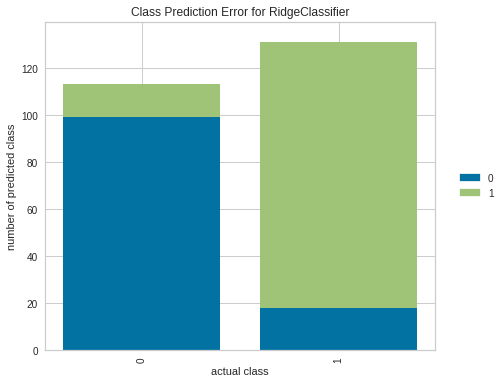

In [14]:
# Errors of the models 
plot_model(tune_base_model, plot = 'error') 

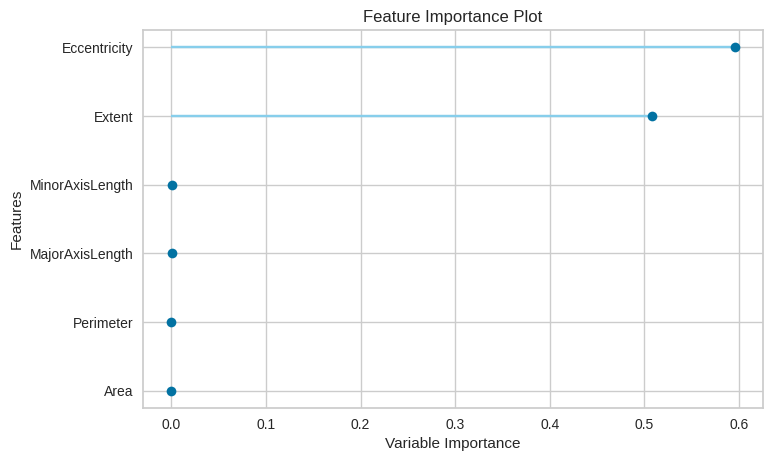

In [15]:
# Feature importtance of the models 
plot_model(tune_base_model, plot = 'feature') 

In [16]:
# Cooks Distance Plot 
plot_model(tune_base_model, plot='cooks')

ValueError: Plot Not Available. Please see docstring for list of available Plots.

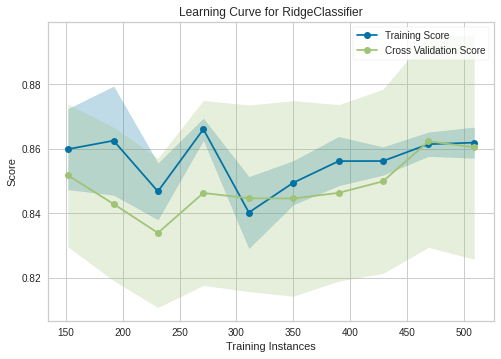

In [17]:
# Learning Curve
plot_model(tune_base_model, plot='learning') 

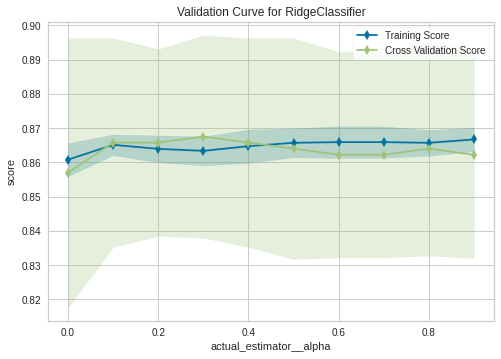

In [18]:
# Validation Curve
plot_model(tune_base_model, plot='vc')

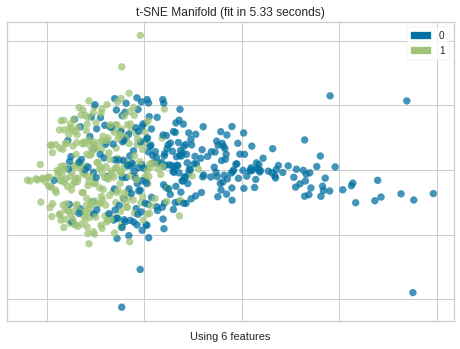

In [19]:
# Manifold Learning
plot_model(tune_base_model, plot='manifold')

In [20]:
# Evaluation of the models 
evaluate_model(tune_base_model) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##### Predict with test data

In [21]:
# Finalizing models 
finalize = finalize_model(tune_base_model)
print(finalize) 

RidgeClassifier(alpha=5.13, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=7347, solver='auto',
                tol=0.001)


In [22]:
# Predicting with the test dataset 
unseen_predictions = predict_model(tune_base_model, data=test)
unseen_predictions.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Label
543,118988,483.340005,315.248465,0.758022,122375,0.784467,1356.398,Besni,Besni
746,122433,585.294198,270.708810,0.886610,128445,0.579493,1526.711,Besni,Besni
644,121757,486.521068,323.351730,0.747181,125067,0.759913,1357.888,Besni,Besni
847,168269,614.380432,353.466300,0.817927,173527,0.756241,1641.456,Besni,Besni
711,204226,648.204288,402.283271,0.784118,207198,0.773988,1724.662,Besni,Besni


##### Blending Models

In [23]:
# Five best models 
ridge = create_model('ridge')
lr = create_model('lr') 
lda = create_model('lda')
gbc = create_model('gbc')
qda = create_model('qda') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8596,0.9173,0.9259,0.8065,0.8621,0.7206,0.7277
1,0.8246,0.9259,0.8519,0.7931,0.8214,0.6494,0.6510
2,0.8246,0.9150,0.8929,0.7812,0.8333,0.6499,0.6563
3,0.8246,0.9384,0.9643,0.7500,0.8437,0.6507,0.6777
4,0.8421,0.9138,0.8571,0.8276,0.8421,0.6843,0.6847
5,0.9123,0.9815,1.0000,0.8485,0.9180,0.8250,0.8380
6,0.8929,0.9234,0.9259,0.8621,0.8929,0.7860,0.7880
7,0.8393,0.9630,0.9259,0.7812,0.8475,0.6802,0.6912
8,0.8393,0.9170,0.8148,0.8462,0.8302,0.6777,0.6782
9,0.8571,0.9387,1.0000,0.7714,0.8710,0.7168,0.7474


In [24]:
ridge_tune = tune_model(ridge, fold=5) 
lr_tune = tune_model(lr, fold=5) 
lda_tune = tune_model(lda, fold=5) 
gbc_tune = tune_model(gbc, fold=5) 
qda_tune = tune_model(qda, fold=5) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8421,0.9032,0.8727,0.8136,0.8421,0.6846,0.6863
1,0.8407,0.9008,0.8889,0.8000,0.8421,0.6823,0.6861
2,0.8584,0.9483,0.8909,0.8305,0.8596,0.7171,0.7189
3,0.8761,0.9263,0.8909,0.8596,0.8750,0.7523,0.7527
4,0.8850,0.9254,0.9091,0.8621,0.8850,0.7701,0.7712
Mean,0.8605,0.9208,0.8905,0.8332,0.8608,0.7213,0.7231
SD,0.0178,0.0174,0.0115,0.0246,0.0172,0.0353,0.0344


In [25]:
blend_specific = blend_models(estimator_list = [ridge_tune, lr_tune, lda_tune, gbc_tune, qda_tune])  

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8070,0.0000,0.8148,0.7857,0.8000,0.6137,0.6141
1,0.8596,0.0000,0.8519,0.8519,0.8519,0.7185,0.7185
2,0.8246,0.0000,0.8571,0.8000,0.8276,0.6494,0.6510
3,0.8596,0.0000,0.8929,0.8333,0.8621,0.7196,0.7213
4,0.7895,0.0000,0.7857,0.7857,0.7857,0.5788,0.5788
5,0.9298,0.0000,0.9643,0.9000,0.9310,0.8598,0.8619
6,0.8929,0.0000,0.8889,0.8889,0.8889,0.7854,0.7854
7,0.9107,0.0000,0.8889,0.9231,0.9057,0.8210,0.8215
8,0.8393,0.0000,0.7778,0.8750,0.8235,0.6769,0.6809
9,0.8750,0.0000,0.9259,0.8333,0.8772,0.7506,0.7550


In [26]:
finalize_blend = finalize_model(blend_specific)
unseen_predictions = predict_model(finalize_blend, data=test, round=0) 
unseen_predictions.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Label
543,118988,483.340005,315.248465,0.758022,122375,0.784467,1356.398,Besni,Besni
746,122433,585.294198,270.708810,0.886610,128445,0.579493,1526.711,Besni,Besni
644,121757,486.521068,323.351730,0.747181,125067,0.759913,1357.888,Besni,Besni
847,168269,614.380432,353.466300,0.817927,173527,0.756241,1641.456,Besni,Besni
711,204226,648.204288,402.283271,0.784118,207198,0.773988,1724.662,Besni,Besni


##### Stacking Models

In [27]:
# Five best models 
ridge = create_model('ridge')
lr = create_model('lr') 
lda = create_model('lda')
gbc = create_model('gbc')
qda = create_model('qda') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8596,0.9173,0.9259,0.8065,0.8621,0.7206,0.7277
1,0.8246,0.9259,0.8519,0.7931,0.8214,0.6494,0.6510
2,0.8246,0.9150,0.8929,0.7812,0.8333,0.6499,0.6563
3,0.8246,0.9384,0.9643,0.7500,0.8437,0.6507,0.6777
4,0.8421,0.9138,0.8571,0.8276,0.8421,0.6843,0.6847
5,0.9123,0.9815,1.0000,0.8485,0.9180,0.8250,0.8380
6,0.8929,0.9234,0.9259,0.8621,0.8929,0.7860,0.7880
7,0.8393,0.9630,0.9259,0.7812,0.8475,0.6802,0.6912
8,0.8393,0.9170,0.8148,0.8462,0.8302,0.6777,0.6782
9,0.8571,0.9387,1.0000,0.7714,0.8710,0.7168,0.7474


In [28]:
ridge_tune = tune_model(ridge, fold=5) 
lr_tune = tune_model(lr, fold=5) 
lda_tune = tune_model(lda, fold=5) 
gbc_tune = tune_model(gbc, fold=5) 
qda_tune = tune_model(qda, fold=5) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8421,0.9032,0.8727,0.8136,0.8421,0.6846,0.6863
1,0.8407,0.9008,0.8889,0.8000,0.8421,0.6823,0.6861
2,0.8584,0.9483,0.8909,0.8305,0.8596,0.7171,0.7189
3,0.8761,0.9263,0.8909,0.8596,0.8750,0.7523,0.7527
4,0.8850,0.9254,0.9091,0.8621,0.8850,0.7701,0.7712
Mean,0.8605,0.9208,0.8905,0.8332,0.8608,0.7213,0.7231
SD,0.0178,0.0174,0.0115,0.0246,0.0172,0.0353,0.0344


In [29]:
stack_1 = stack_models(estimator_list=[ridge_tune, lr_tune, lda_tune, gbc_tune, qda_tune]) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8070,0.9235,0.8148,0.7857,0.8000,0.6137,0.6141
1,0.8246,0.9235,0.7778,0.8400,0.8077,0.6468,0.6485
2,0.8421,0.9039,0.8929,0.8065,0.8475,0.6847,0.6885
3,0.8246,0.9101,0.8929,0.7812,0.8333,0.6499,0.6563
4,0.8246,0.9249,0.7857,0.8462,0.8148,0.6486,0.6502
5,0.9298,0.9840,0.9286,0.9286,0.9286,0.8596,0.8596
6,0.8929,0.9183,0.8889,0.8889,0.8889,0.7854,0.7854
7,0.9107,0.9732,0.8889,0.9231,0.9057,0.8210,0.8215
8,0.8214,0.9310,0.7778,0.8400,0.8077,0.6415,0.6431
9,0.8750,0.9400,0.9259,0.8333,0.8772,0.7506,0.7550


In [30]:
finalize_stack = finalize_model(stack_1)
unseen_predictions = predict_model(finalize_stack, data=test, round=0)
unseen_predictions.head() 

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Label,Score
543,118988,483.340005,315.248465,0.758022,122375,0.784467,1356.398,Besni,Besni,1.0
746,122433,585.294198,270.708810,0.886610,128445,0.579493,1526.711,Besni,Besni,1.0
644,121757,486.521068,323.351730,0.747181,125067,0.759913,1357.888,Besni,Besni,1.0
847,168269,614.380432,353.466300,0.817927,173527,0.756241,1641.456,Besni,Besni,1.0
711,204226,648.204288,402.283271,0.784118,207198,0.773988,1724.662,Besni,Besni,1.0


# 15. Using FLAML

In [104]:
# Categorical to numerical 
data["class_int"] = (data["Class"] == 'Besni').astype('int')

# Drop the previous string column
data.drop(['Class'], axis=1, inplace=True)

data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,class_int
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [105]:
X = data.iloc[:, 0:7]
y = data.iloc[:, 7] 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.1) 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 

(810, 7) (90, 7) (810,) (90,)


### 1. Using XGBoost

In [106]:
automl = AutoML()
settings = { 
    "time_budget": 60,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['xgboost'],  # list of ML learners; we tune XGBoost in this example
    "task": 'classification',  # task type  
    "log_file_name": 'houses_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
} 
automl.fit(X_train=x_train, y_train=y_train, **settings)

[flaml.automl: 05-27 10:44:23] {2365} INFO - task = classification
[flaml.automl: 05-27 10:44:23] {2367} INFO - Data split method: stratified
[flaml.automl: 05-27 10:44:23] {2371} INFO - Evaluation method: cv
[flaml.automl: 05-27 10:44:23] {2448} INFO - Minimizing error metric: 1-r2
[flaml.automl: 05-27 10:44:23] {2561} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 05-27 10:44:23] {2853} INFO - iteration 0, current learner xgboost
[flaml.automl: 05-27 10:44:23] {2983} INFO - Estimated sufficient time budget=2193s. Estimated necessary time budget=2s.
[flaml.automl: 05-27 10:44:23] {3030} INFO -  at 0.3s,	estimator xgboost's best error=0.5630,	best estimator xgboost's best error=0.5630
[flaml.automl: 05-27 10:44:23] {2853} INFO - iteration 1, current learner xgboost
[flaml.automl: 05-27 10:44:23] {3030} INFO -  at 0.5s,	estimator xgboost's best error=0.5581,	best estimator xgboost's best error=0.5581
[flaml.automl: 05-27 10:44:23] {2853} INFO - iteration 2, current

##### Retrieve best config

In [107]:
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print(automl.model.estimator)

Best hyperparmeter config: {'n_estimators': 28, 'max_leaves': 5, 'learning_rate': 0.3087528042138667, 'subsample': 0.9072886376267256, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.9819264387817598, 'reg_alpha': 0.011305689089790318, 'reg_lambda': 5.707072506331478, 'min_child_weight': 0.01598628550601919}
Best r2 on validation data: 0.4864
Training duration of best run: 0.09213 s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=0.9819264387817598, gamma=0,
              gpu_id=-1, grow_policy='lossguide', importance_type='gain',
              interaction_constraints='', learning_rate=0.3087528042138667,
              max_delta_step=0, max_depth=0, max_leaves=5,
              min_child_weight=0.01598628550601919, missing=nan,
              monotone_constraints='()', n_estimators=28, n_jobs=-1,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0.011305689089790318, reg_lambda=5.7070725063

##### Plot feature importance​

<BarContainer object of 7 artists>

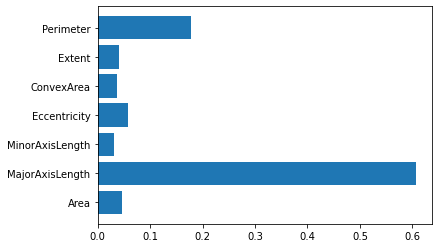

In [108]:
plt.barh(x_train.columns, automl.model.estimator.feature_importances_)

##### Compute predictions of testing dataset

In [109]:
y_pred = automl.predict(x_test)
print('Predicted labels', y_pred)

Predicted labels [1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0]


<AxesSubplot:>

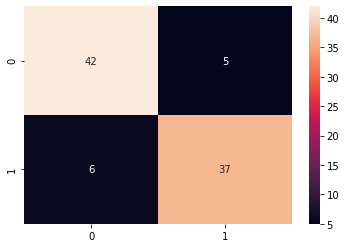

In [110]:
# Confusion Matrix 
# Confusion Matrix 
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True) 

In [111]:
# Classification Report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.88      0.86      0.87        43

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



In [112]:
# Model Saving 
filename = "/home/moni/Desktop/Task_1/flaml_xgboost_raisin_classification.sav" 
pickle.dump(automl, open(filename, 'wb')) 

### 1. Using Lightgbm

In [75]:
automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['lgbm'],  # list of ML learners; we tune lightgbm in this example
    "task": 'classification',  # task type  
    "log_file_name": 'houses_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
}
automl.fit(X_train=x_train, y_train=y_train, **settings)

[flaml.automl: 05-27 10:12:04] {2365} INFO - task = classification
[flaml.automl: 05-27 10:12:04] {2367} INFO - Data split method: stratified
[flaml.automl: 05-27 10:12:04] {2371} INFO - Evaluation method: cv
[flaml.automl: 05-27 10:12:04] {2448} INFO - Minimizing error metric: 1-r2
[flaml.automl: 05-27 10:12:04] {2561} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 05-27 10:12:04] {2853} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-27 10:12:04] {2983} INFO - Estimated sufficient time budget=1802s. Estimated necessary time budget=2s.
[flaml.automl: 05-27 10:12:04] {3030} INFO -  at 0.2s,	estimator lgbm's best error=0.5877,	best estimator lgbm's best error=0.5877
[flaml.automl: 05-27 10:12:04] {2853} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-27 10:12:05] {3030} INFO -  at 0.3s,	estimator lgbm's best error=0.5877,	best estimator lgbm's best error=0.5877
[flaml.automl: 05-27 10:12:05] {2853} INFO - iteration 2, current learner lgbm
[flaml.

In [76]:
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print(automl.model.estimator)

Best hyperparmeter config: {'n_estimators': 9, 'num_leaves': 5, 'min_child_samples': 44, 'learning_rate': 0.5687189013509643, 'log_max_bin': 9, 'colsample_bytree': 1.0, 'reg_alpha': 0.005558687915468798, 'reg_lambda': 0.6354865264943064}
Best r2 on validation data: 0.4963
Training duration of best run: 0.03569 s
LGBMClassifier(learning_rate=0.5687189013509643, max_bin=511,
               min_child_samples=44, n_estimators=9, num_leaves=5,
               reg_alpha=0.005558687915468798, reg_lambda=0.6354865264943064,
               verbose=-1)


<BarContainer object of 7 artists>

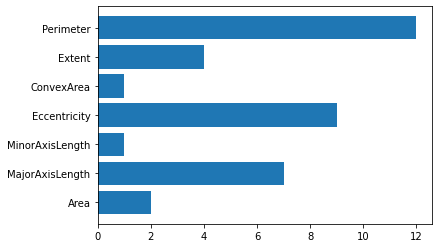

In [77]:
plt.barh(automl.model.estimator.feature_name_, automl.model.estimator.feature_importances_)

In [78]:
y_pred = automl.predict(x_test)
print('Predicted labels', y_pred)

Predicted labels [0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0]


<AxesSubplot:>

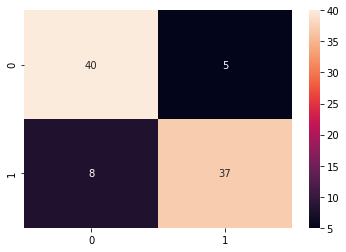

In [79]:
# Confusion Matrix 
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True) 

In [80]:
# Classification Report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        45
           1       0.88      0.82      0.85        45

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.86      0.86      0.86        90



### 3. Using sklearn Pipeline

In [81]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from flaml import AutoML

set_config(display='diagram')

In [82]:
imputer = SimpleImputer()
standardizer = StandardScaler()
automl = AutoML()

automl_pipeline = Pipeline([
    ("imputuer",imputer),
    ("standardizer", standardizer),
    ("automl", automl)
])
automl_pipeline

Pipeline(steps=[('imputuer', SimpleImputer()),
                ('standardizer', StandardScaler()),
                ('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        early_stop=False, ensemble=False, estimator_list='auto',
                        eval_method='auto', fit_kwargs_by_estimator={},
                        hpo_method='auto', keep_search_state=False,
                        learner_selector='sample', log_file_name='',
                        log_training_metric=False, log_type='better',
                        max_iter=1000000, mem_thres=4294967296, metric='auto',
                        metric_constraints=[], min_sample_size=10000,
                        model_history=False, n_concurrent_trials=1, n_jobs=-1,
                        n_splits=5, pred_time_limit=inf, retrain_full=True,
                        sample=True, split_ratio=0.1, split_type='auto',
                        starting_points='static', task='classification', ...))])

In [83]:
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics can be chosen from: ['accuracy','roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'f1','log_loss','mae','mse','r2']
    "task": 'classification',  # task type  
    "estimator_list":['xgboost','catboost','lgbm'],
    "log_file_name": 'airlines_experiment.log',  # flaml log file
}
automl_pipeline.fit(x_train, y_train,
                    automl__time_budget=60,
                    automl__metric="accuracy")

[flaml.automl: 05-27 10:15:01] {2365} INFO - task = classification
[flaml.automl: 05-27 10:15:01] {2367} INFO - Data split method: stratified
[flaml.automl: 05-27 10:15:01] {2371} INFO - Evaluation method: cv
[flaml.automl: 05-27 10:15:01] {2448} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 05-27 10:15:01] {2561} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-27 10:15:01] {2853} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-27 10:15:01] {2983} INFO - Estimated sufficient time budget=2981s. Estimated necessary time budget=69s.
[flaml.automl: 05-27 10:15:01] {3030} INFO -  at 0.3s,	estimator lgbm's best error=0.1481,	best estimator lgbm's best error=0.1481
[flaml.automl: 05-27 10:15:01] {2853} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-27 10:15:01] {3030} INFO -  at 0.4s,	estimator lgbm's best error=0.1444,	best estimator lgbm's best error=0.1444
[flaml.automl: 05-27 1

Pipeline(steps=[('imputuer', SimpleImputer()),
                ('standardizer', StandardScaler()),
                ('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        early_stop=False, ensemble=False, estimator_list='auto',
                        eval_method='auto', fit_kwargs_by_estimator={},
                        hpo_method='auto', keep_search_state=False,
                        learner_selector='sample', log_file_name='',
                        log_training_metric=False, log_type='better',
                        max_iter=1000000, mem_thres=4294967296, metric='auto',
                        metric_constraints=[], min_sample_size=10000,
                        model_history=False, n_concurrent_trials=1, n_jobs=-1,
                        n_splits=5, pred_time_limit=inf, retrain_full=True,
                        sample=True, split_ratio=0.1, split_type='auto',
                        starting_points='static', task='classification', ...))])

In [84]:
automl = automl_pipeline.steps[2][1]
# Get the best config and best learner
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1 - automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgb_limitdepth
Best hyperparmeter config: {'n_estimators': 14, 'max_depth': 6, 'learning_rate': 0.7598549045563152, 'subsample': 0.5355227525144967, 'colsample_bylevel': 0.9101951606082934, 'colsample_bytree': 0.8326274330209584, 'reg_alpha': 0.03809862389786848, 'reg_lambda': 19.083214453645212, 'min_child_weight': 0.22294046456446767}
Best accuracy on validation data: 0.8716
Training duration of best run: 0.0962 s


In [85]:
y_pred = automl_pipeline.predict(x_test) 
print('Predicted labels', y_pred)

Predicted labels [0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0]


<AxesSubplot:>

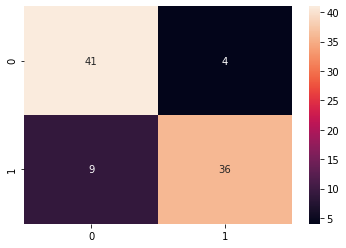

In [86]:
# Confusion Matrix 
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True) 

In [87]:
# Classification Report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        45
           1       0.90      0.80      0.85        45

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.86      0.86      0.86        90



### 4. Using AutoML 

In [88]:
automl = AutoML() 
automl.fit(x_train, y_train, task='classification', metric='ndcg', time_budget=300) 

[flaml.automl: 05-27 10:18:31] {2365} INFO - task = classification
[flaml.automl: 05-27 10:18:31] {2367} INFO - Data split method: stratified
[flaml.automl: 05-27 10:18:31] {2371} INFO - Evaluation method: cv
[flaml.automl: 05-27 10:18:31] {2448} INFO - Minimizing error metric: 1-ndcg
[flaml.automl: 05-27 10:18:31] {2561} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-27 10:18:31] {2853} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-27 10:18:31] {2983} INFO - Estimated sufficient time budget=1976s. Estimated necessary time budget=46s.
[flaml.automl: 05-27 10:18:31] {3030} INFO -  at 0.2s,	estimator lgbm's best error=0.0479,	best estimator lgbm's best error=0.0479
[flaml.automl: 05-27 10:18:31] {2853} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-27 10:18:31] {3030} INFO -  at 0.3s,	estimator lgbm's best error=0.0456,	best estimator lgbm's best error=0.0456
[flaml.automl: 05-27 10:18

In [89]:
print("Best ML Algorithm :", automl.best_estimator) 
print("Best Hyperparameters :", automl.best_config) 
print("Training Duration : {0: .4g} s".format(automl.best_config_train_time))

Best ML Algorithm : rf
Best Hyperparameters : {'n_estimators': 6, 'max_features': 0.331058004576134, 'max_leaves': 6, 'criterion': 'entropy'}
Training Duration :  0.05906 s


In [90]:
y_pred = automl.predict(x_test) 

<AxesSubplot:>

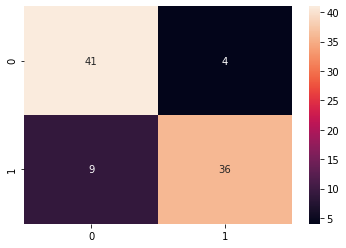

In [91]:
# Confusion Matrix 
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True) 

In [92]:
# Classification Report  
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        45
           1       0.90      0.80      0.85        45

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.86      0.86      0.86        90



# 16. Predicting with totally new data

In [129]:
# loading the model 
file_name = "/home/moni/Desktop/Task_1/flaml_xgboost_raisin_classification.sav"
loaded_model = pickle.load(open(file_name, 'rb')) 

# prediction function for predicting with new data  
def predict_func(l_model, area, majorAxisLength, minorAxisLength, eccentricity, convexArea, extent, perimeter):
    df = pd.DataFrame.from_dict({"Area": [area], "MajorAxisLength": [majorAxisLength], "MinorAxisLength": [minorAxisLength], "Eccentricity": [eccentricity], "ConvexArea": [convexArea], "Extent": [extent], "Perimeter": [perimeter]})
    predicted = l_model.predict(df)
    
    if predicted[0] == 0:
        return "Kecimen"
    else: 
        return "Besni"  
    
    
prediction = predict_func(loaded_model, 87524, 442.246011, 253.291155, 0.819738, 90546, 0.758651, 1184.040)
prediction 

'Kecimen'

# 17. Future Task 

In [ ]:
1. Use Deep Learning like TensorFlow(Keras Tuner), PyTorch with hyperparameter tuning 
2. Use TFX for production pipeline model for CI(continuous integration), CD(continuous development), CT(continuous training), CM(continuous monitoring) when use TensorFlow 
3. Advance feature engineering 
4. There are some outlier in some features we can drop those data for increasing accuracy, F1 score. Here we did not drop outlier because of small size of the dataset. 
